In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [3]:
# Will allow us to embed images in the notebook
%matplotlib inline

In [4]:
canceled = pd.read_csv('canceled_test.csv', index_col=0, parse_dates=['Order Date'])
# we can later change the data type of this to date with df['time'] = pd.to_datetime(df['time'])
sales = pd.read_csv('sales_test.csv', index_col=0, parse_dates=['Order Date'])

In [5]:
canceled.head(4)

,Line Number,Order Date,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled
Order Number,,,,,,
528703,1,2017-01-03,1857566.0,10135139,1,1
528705,1,2017-01-03,1857566.0,10135140,1,1
528706,2,2017-01-03,1857566.0,10135138,1,1
528707,1,2017-01-03,1857566.0,10135132,1,1


In [6]:
canceled.tail(4)

,Line Number,Order Date,Ship To Address No,Item Code,Quantity Ordered,Quantity Canceled
Order Number,,,,,,
543488,6,2017-02-25,2203449.0,1040468,2,2
543488,7,2017-02-25,2203449.0,1040466,1,1
543491,5,2017-02-25,2203449.0,10135358,21,21
543491,9,2017-02-25,2203449.0,10135363,6,6


## In all the order numbers the number of items which were ordered were cancelled and there is no partiel cancellation.

In [7]:
canceled.dtypes

Line Number                    int64
Order Date            datetime64[ns]
Ship To Address No           float64
Item Code                      int64
Quantity Ordered               int64
Quantity Canceled              int64
dtype: object

In [8]:
pltdf = canceled[['Order Date','Quantity Ordered','Quantity Canceled']].copy()
pltdf.head(10)

,Order Date,Quantity Ordered,Quantity Canceled
Order Number,,,
528703,2017-01-03,1,1
528705,2017-01-03,1,1
528706,2017-01-03,1,1
528707,2017-01-03,1,1
528708,2017-01-03,1,1
528710,2017-01-03,1,1
528711,2017-01-03,1,1
528712,2017-01-03,1,1
528713,2017-01-03,1,1


## with above data we can confidently say that there is no partieal cancellations. so we can drop the coloumn "Quantity Canceled" for plotting

In [9]:
pltdf.drop('Quantity Canceled', axis=1,inplace=True)

## Now as we have to plot the daily volume, let us group our data with order date and get sum of order quantity for each day.

## After performing the abve task, we will set order date as our dataframe index.

In [10]:
daily = pltdf.groupby('Order Date')['Quantity Ordered'].sum().reset_index()
daily.set_index('Order Date', inplace=True)

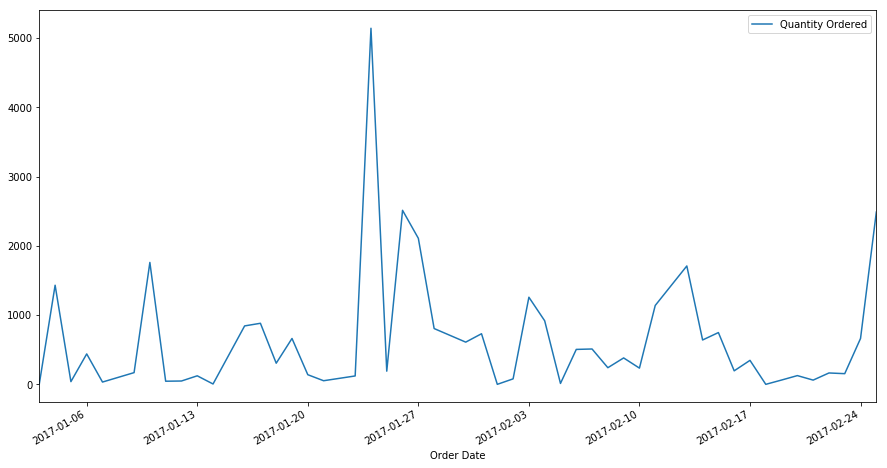

In [28]:
daily.plot()

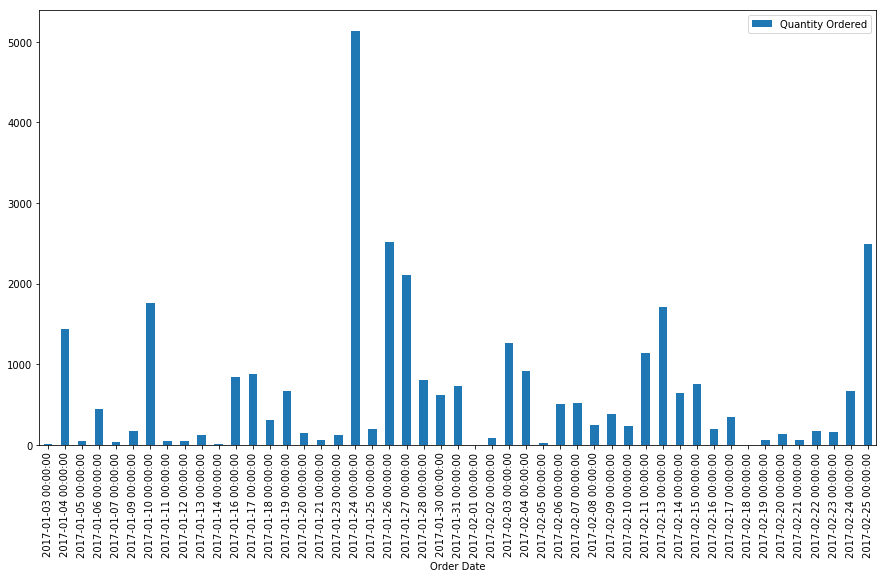

In [27]:
daily.plot(kind='bar')

In [13]:
weekly = daily['Quantity Ordered'].resample('W').sum()

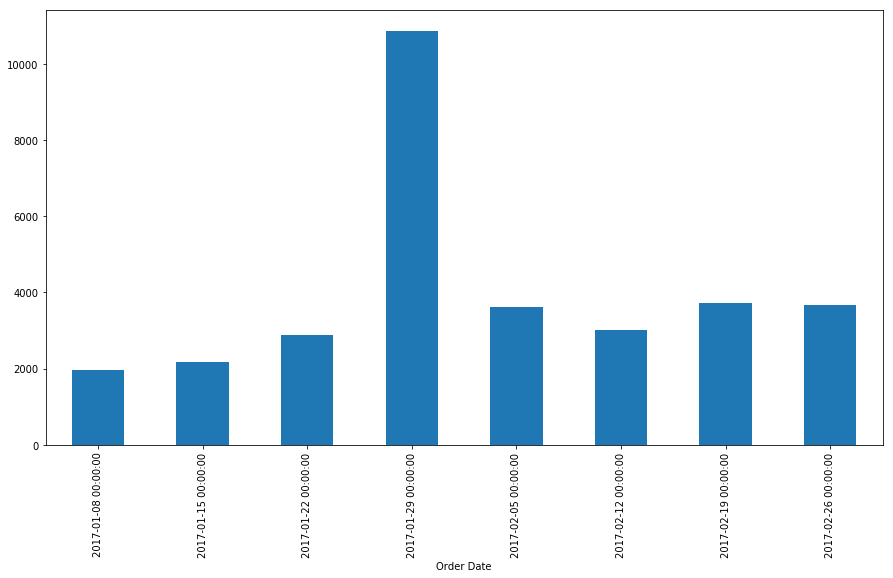

In [29]:
weekly.plot(kind='bar')

In [16]:
monthly = daily['Quantity Ordered'].resample('MS').sum()

In [17]:
monthly['2017':]

Order Date
2017-01-01    19241
2017-02-01    12672
Freq: MS, Name: Quantity Ordered, dtype: int64

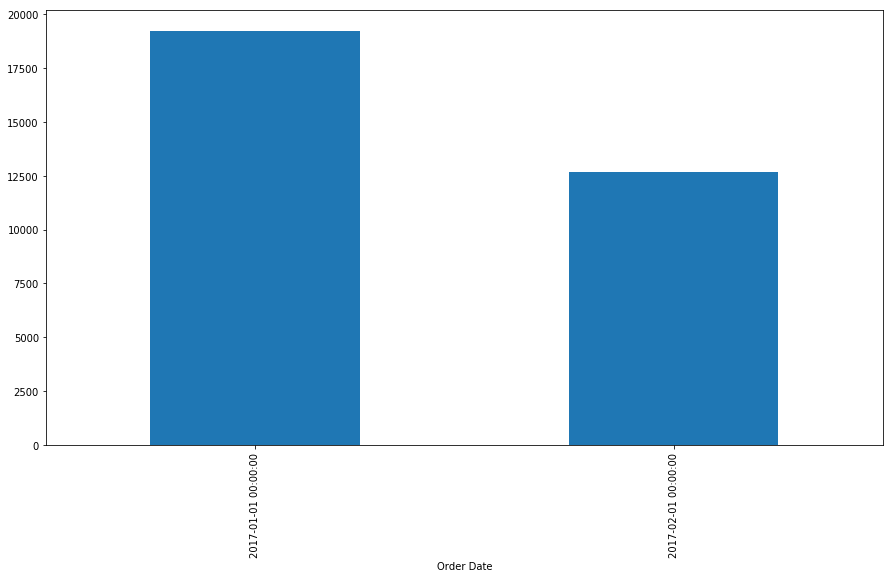

In [30]:
monthly.plot(kind = 'bar')

## So we are done plotting canceled test data, let us plot and see sales data

In [19]:
sales.head(4)

,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
Order No,,,,,,
528758,2017-01-03,1,1358538.0,111931,70.0,70.0
528791,2017-01-03,1,1254798.0,1029071,10.0,10.0
528791,2017-01-03,2,1254798.0,1033341,10.0,10.0
528791,2017-01-03,3,1254798.0,1040827,5.0,5.0


In [20]:
sales.tail()

,Order Date,Line No,Ship To Address No,Item Code,Order Qty,Quantity Shipped
Order No,,,,,,
543761,2017-02-28,1,43825307.0,113106,380.0,380.0
543762,2017-02-28,1,1255123.0,113106,300.0,300.0
543764,2017-02-28,2,43825307.0,10131275,400.0,400.0
543765,2017-02-28,1,43825307.0,10131275,300.0,300.0
543766,2017-02-28,2,1255123.0,10131275,100.0,100.0


In [21]:
sales.dtypes

Order Date            datetime64[ns]
Line No                        int64
Ship To Address No           float64
Item Code                      int64
Order Qty                    float64
Quantity Shipped             float64
dtype: object

In [22]:
pltdf = sales[['Order Date','Order Qty']].copy()
pltdf.head(10)

,Order Date,Order Qty
Order No,,
528758,2017-01-03,70.0
528791,2017-01-03,10.0
528791,2017-01-03,10.0
528791,2017-01-03,5.0
528791,2017-01-03,10.0
528791,2017-01-03,15.0
528791,2017-01-03,15.0
528791,2017-01-03,15.0
528791,2017-01-03,15.0


## Now as we have to plot the daily volume, let us group our data with order date and get sum of order quantity for each day.

## After performing the abve task, we will set order date as our dataframe index.

In [23]:
dailyS = pltdf.groupby('Order Date')['Order Qty'].sum().reset_index()
dailyS.set_index('Order Date', inplace=True)

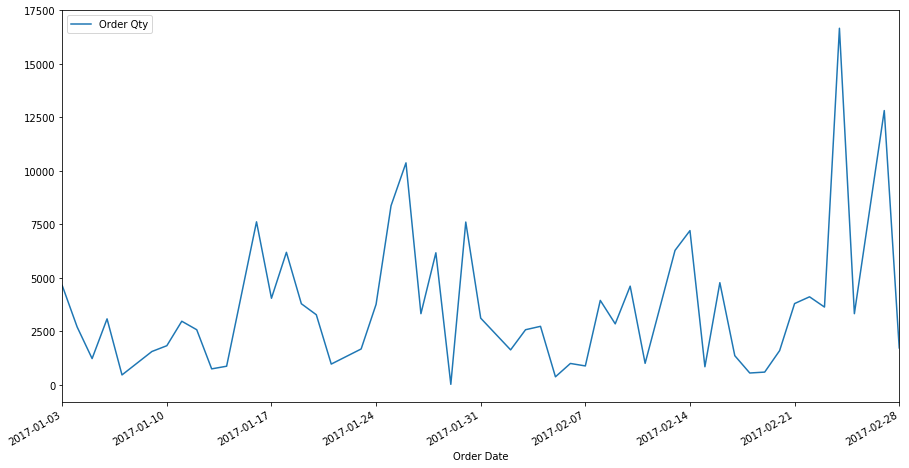

In [31]:
dailyS.plot()

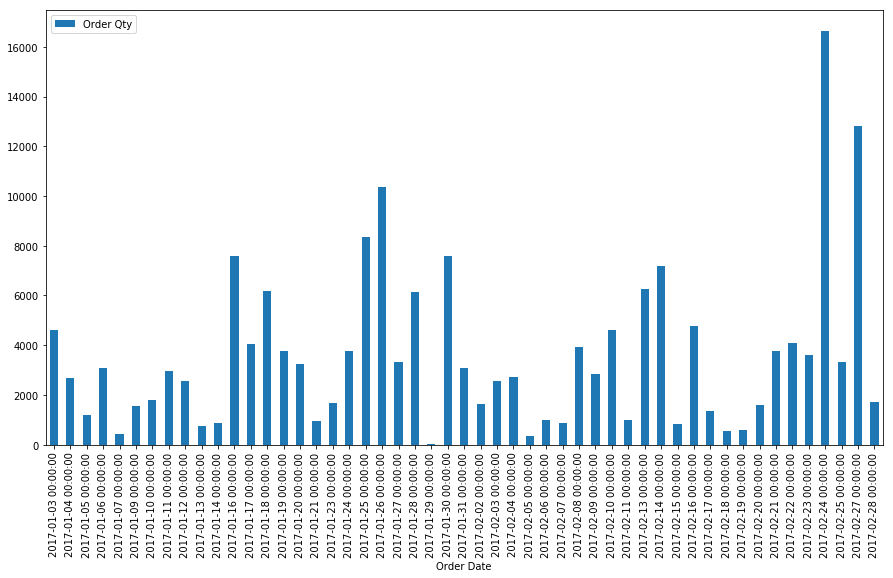

In [32]:
dailyS.plot(kind='bar')